# Pset 5

## Problem 1

Consider the following ordinary differential equation  

$$\frac{dx}{dt} = i x, \quad x(0) = 1$$  

where $i = \sqrt{-1}$.  

1. What is the analytical solution of the ODE at $t = \pi$?  

2. Write a code to numerically solve the ODE using forward Euler. What is the numerical solution at $t = \pi$ with the following time step sizes?  
   $\Delta t = \pi / 2^n, \quad n = 0, 1, \dots, 10$  

3. Generate a **log-log** plot of the solution error (the absolute value of difference between the numerical and analytical solutions) at $t = \pi$ versus $\Delta t$. Describe what you observe in the plot.  


## Solution:

### Part 1
We consider the ODE  
$$
\frac{dx}{dt} = i x, \quad x(0)=1, \quad \text{where } i=\sqrt{-1}.
$$  
Separating variables or recognizing it as a standard first-order linear ODE, we obtain the solution  
$$
x(t) = e^{i t}.
$$  
Evaluating at $t=\pi$:  
$$
x(\pi) = e^{i \pi} = -1.
$$  
Thus, the analytical solution at $t=\pi$ is $-1$.


0 (1+3.141592653589793j)
1 (-1.4674011002723395+3.141592653589793j)
2 (-2.320597388556937+1.2037003610710544j)
3 (-1.7553676637374411+0.2617424971050859j)
4 (-1.3523575215265728+0.05339692774278987j)
5 (-1.1658189293767178+0.01169964130484337j)
6 (-1.0800532683412984+0.002721367899543206j)
7 (-1.039293687670873+0.0006553749548332856j)
8 (-1.0194620715000515+0.00016076084087411277j)
9 (-1.0096846994337163+3.980745440099447e-05j)
10 (-1.004830750680357+9.90418889498107e-06j)


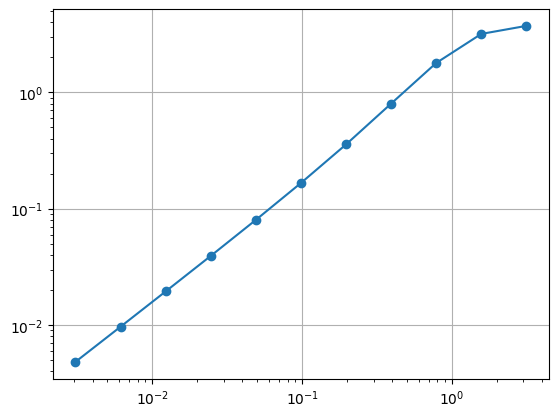

In [1]:
# Part 2 (Numerical Solution Code)

from pylab import *

error = []

for n in range(11):
    dt = pi / 2**n   # time step size
    x = 1            # initial condition
    # Forward Euler update: x_{k+1} = x_k + i * x_k * dt
    for i in range(2**n):
        x = x + 1j * dt * x
    print(n, x)                 # print n and the numerical approximation
    error.append(abs(x + 1))    # error = |x - (-1)| = |x + 1|

loglog(pi / 2**arange(11), error, 'o-')
grid()

### Part 3 
1. **Plot Interpretation**: The figure plots the absolute error $\lvert x(\pi) + 1 \rvert$ versus the time step size $\Delta t$ on a log-log scale.  
2. **Observations**:  
   - As $\Delta t$ decreases, the numerical solution converges to the exact value $-1$.  
   - The linear trend in the log-log plot indicates a first-order convergence rate (Forward Euler is known to be $O(\Delta t)$ accurate).  
3. **Conclusion**: Reducing $\Delta t$ improves the accuracy, and the errors align with the theoretical first-order convergence behavior of the Forward Euler method.


## Problem 2

Consider the following numerical integration methods:  

1.  
   $$ v^{n+1} = -4v^n + 5v^{n-1} + 4\Delta t F(v^n) + 2\Delta t F(v^{n-1}) $$  

2.  
   $$ v^{n+1} = v^n + \frac{3}{2} \Delta t F(v^{n+1}) - \frac{1}{2} \Delta t F(v^{n-1}) $$  

- For each scheme, determine whether it is zero stable.  
- For each scheme, determine its global order of accuracy.  
- For each scheme, determine whether it is eigenvalue stable in solving the equation  

  $$ \frac{du}{dt} = -\lambda u $$  

  for a real, nonnegative $\lambda$. If your answer depends on $\Delta t$, state the range of $\Delta t$ for which the scheme is eigenvalue stable.  


## Solution

We consider two linear multistep schemes:

1. **Scheme 1**  
   $$
   v^{n+1} = -4\,v^n + 5\,v^{n-1} + 4\,\Delta t\,F(v^n) + 2\,\Delta t\,F(v^{n-1}).
   $$

2. **Scheme 2**  
   $$
   v^{n+1} = v^n + \tfrac{3}{2}\,\Delta t\,F(v^{n+1}) - \tfrac{1}{2}\,\Delta t\,F(v^{n-1}).
   $$

Below we determine zero stability, global order of accuracy, and eigenvalue stability for each scheme. The eigenvalue stability is checked by applying each scheme to the test equation

$$
\frac{du}{dt} = -\lambda\,u, \quad \lambda \ge 0.
$$

---

### 1. Scheme 1

#### 1.1 Zero Stability
Set $F \equiv 0$. The method reduces to

$$
v^{n+1} = -4\,v^n + 5\,v^{n-1}.
$$

Assuming a trial solution $v^n = r^n$ gives the characteristic polynomial

$$
r^2 + 4r - 5 = 0,
$$

with roots $r=1$ and $r=-5$. Since $|-5| > 1$, the method fails the root condition and is **not zero stable**.

#### 1.2 Global Order of Accuracy
A local truncation error analysis (via Taylor expansions) shows that the scheme is **formally second order**. However, due to the lack of zero stability, it will not converge in practice.

#### 1.3 Eigenvalue Stability
For the test equation $F(v)=-\lambda\,v$, the scheme becomes

$$
v^{n+1} = (-4 - 4\,\lambda\,\Delta t)\,v^n + (5 - 2\,\lambda\,\Delta t)\,v^{n-1}.
$$

Its homogeneous part already has a root of magnitude 5 when $\Delta t=0$. Hence, for $\lambda\Delta t > 0$, there is no value of $\Delta t$ that stabilizes this large root. The method is therefore **eigenvalue unstable for all $\Delta t$**.

---

### 2. Scheme 2

#### 2.1 Zero Stability
Set $F \equiv 0$. The method reduces to

$$
v^{n+1} = v^n.
$$

The characteristic equation is $r-1=0$, with a simple root $r=1$. Thus, **zero stability holds**.

#### 2.2 Global Order of Accuracy
By examining the local truncation error (using Taylor expansions around $t_n$), one finds that the method has **first-order accuracy** globally ($O(\Delta t)$).

#### 2.3 Eigenvalue Stability
Substitute $F(v)=-\lambda\,v$ into

$$
v^{n+1} = v^n - \tfrac{3}{2}\,\lambda\,\Delta t\,v^{n+1} + \tfrac{1}{2}\,\lambda\,\Delta t\,v^{n-1}.
$$

Rearrange to:

$$
\Bigl(1 + \tfrac{3}{2}\,\lambda\,\Delta t\Bigr)v^{n+1} = v^n + \tfrac{1}{2}\,\lambda\,\Delta t\,v^{n-1}.
$$

Assuming a trial solution $v^n = r^n$ leads to a quadratic equation in $r$. One can show that for $\lambda \ge 0$ and $\Delta t > 0$, the magnitudes of both roots satisfy $|r| \le 1$. Hence, the scheme is **eigenvalue stable for all $\Delta t > 0$**.

---

#### Summary

- **Scheme 1**  
  - **Zero Stability**: Fails (one root is $-5$).  
  - **Global Order**: Formally second order, but non-convergent due to zero instability.  
  - **Eigenvalue Stability**: Unstable for any $\Delta t$.

- **Scheme 2**  
  - **Zero Stability**: Succeeds (root is $1$).  
  - **Global Order**: First order.  
  - **Eigenvalue Stability**: Stable for all $\lambda \ge 0$ and $\Delta t > 0$.


## Problem 3

A reasonable model of the velocity $v(t)$ of a skydiver is

$ \frac{dv}{dt} = -g + \frac{k}{m} v^2, \quad v(0) = 0, $

where $g = 9.8 \, \text{m/sec}^2$ is gravitational acceleration, $m$ is the mass of the skydiver with parachute, and $k$ quantifies the effect of air resistance. At the US Air Force Academy, a training jump starts at about 1200 m and has $k = 0.4875$ for $t < 13$ and $k = 29.16$ for $t \geq 13$. (This is an oversimplification; see Meade & Struthers (1999).)

(a) Solve the IVP for $v$ for an 80-kg cadet for $t \in [0,200]$, and plot the solution.

(b) Suppose we also want the altitude h, satisfying $dh/dt = -v$.   Write a combined system of ODEs du/dt = f(u,t) for the vector u = [v, h].  (What is the right-hand-side f(u,t) and the initial condition u(0)?)   Plug this system into your numerical solver algorithm from part (a) and plot the resulting h(t) (from the second component of the solution).

(c) You should have found that the altitude h becomes negative at some point.  How would you determine, consistent with your approximate solver in part (b), the time t at which h(t)=0? (i.e. when does the skydiver hit the ground?).   (Hint: what interpolation between data points $t_n, u_n$ is implied by your numerical method?)






  
